## Observations and Insights 

%matplotlib notebook

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset 
# Use concat and axis=0 to have dataframes on top of each other; source:https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html
#merged_df = pd.concat([mouse_metadata, study_results], axis= 1)
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",)

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [113]:
# Checking the number of mice.
total_df = pd.DataFrame({"Mice Total":[merged_df["Mouse ID"].value_counts().sum()]})
total_df

,Mice Total
0,1893


In [114]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#merged_df[merged_df['Mouse ID'].duplicated()].sum()
#Source Reference:https://datatofish.com/count-duplicates-pandas/
duplicate = merged_df.pivot_table(index=['Mouse ID', 'Timepoint'], aggfunc = 'size')

In [115]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate)

Mouse ID  Timepoint
a203      0            1
          5            1
          10           1
          15           1
          20           1
                      ..
z969      25           1
          30           1
          35           1
          40           1
          45           1
Length: 1888, dtype: int64


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#deleted_df = merged_df.drop_duplicates(subset = "Mouse ID" ,keep=False)

#Source Reference:https://stackoverflow.com/questions/12497402/python-pandas-remove-duplicates-by-columns-a-keeping-the-row-with-the-highest
final_df = merged_df.groupby('Mouse ID', group_keys=False).apply(lambda x: x.loc[x.Timepoint.idxmax()])
final_df
#del final_df['Mouse ID']
#final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,,
a203,a203,Infubinol,Female,20,23,45,67.973419,2
a251,a251,Infubinol,Female,21,25,45,65.525743,1
a262,a262,Placebo,Female,17,29,45,70.717621,4
a275,a275,Ceftamin,Female,20,28,45,62.999356,3
a366,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
z435,z435,Propriva,Female,12,26,10,48.710661,0
z578,z578,Ramicane,Male,11,16,45,30.638696,0
z581,z581,Infubinol,Female,24,25,45,62.754451,3


In [117]:
# Checking the number of mice in the clean DataFrame.
clean_df = pd.DataFrame({"Mice Total":[final_df["Mouse ID"].value_counts().sum()]})
clean_df

,Mice Total
0,249


## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#Drug Regimen Count to be able to assess each regimen 
drug = final_df["Drug Regimen"].value_counts()
drug

#To collect data 
grouped_regimen_df = final_df.groupby('Drug Regimen')

#Mean of all regimens
average_regimen = grouped_regimen_df['Tumor Volume (mm3)'].mean()

#Median of all regimens
median_regimen = grouped_regimen_df['Tumor Volume (mm3)'].median()

#Variance of all regimens
variance_regimen = grouped_regimen_df['Tumor Volume (mm3)'].var()

#Standard Deviation of all regimens
stdev_regimen = grouped_regimen_df['Tumor Volume (mm3)'].std()

#SEM of all regimens 
sem_regimen = grouped_regimen_df['Tumor Volume (mm3)'].sem()

#Group values together to display in table format 
drug_df = pd.concat([average_regimen, median_regimen, 
                     variance_regimen, stdev_regimen, sem_regimen],
                    axis=1,keys=('Average (mm3)','Median (mm3)',
                                 'Variance (mm3)', 'Standard Deviation (mm3)',
                                 'SEM (mm3)',
                                ))

#To round and format values correctly in table
drug_df["Average (mm3)"] = drug_df["Average (mm3)"].map("{:.2f}".format)
drug_df["Median (mm3)"] = drug_df["Median (mm3)"].map("{:.2f}".format)
drug_df["Variance (mm3)"] = drug_df["Variance (mm3)"].map("{:.2f}".format)
drug_df["Standard Deviation (mm3)"] = drug_df["Standard Deviation (mm3)"].map("{:.2f}".format)
drug_df["SEM (mm3)"] = drug_df["SEM (mm3)"].map("{:.2f}".format)

drug_df

,Average (mm3),Median (mm3),Variance (mm3),Standard Deviation (mm3),SEM (mm3)
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Bar and Pie Charts

Text(0.5, 0, 'Treatment Regimen Type')

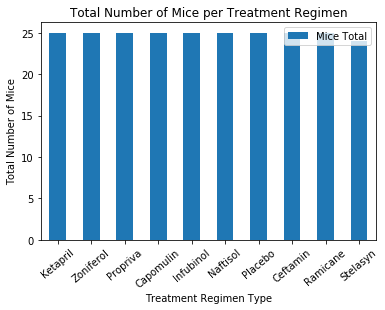

In [120]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
grouped_regimen_df = final_df.groupby('Drug Regimen')

#View how many mice are in each regimen and regimen info
drug = final_df["Drug Regimen"].value_counts()
drug

#Plot values of mice versus regimen type
data = pd.DataFrame({"Mice Total":[25,25,25,25,25,25,25,25,25,24]},
                    index=["Ketapril","Zoniferol","Propriva","Capomulin","Infubinol",
                    "Naftisol","Placebo","Ceftamin","Ramicane","Stelasyn"])
data.plot(kind = "bar")
plt.title("Total Number of Mice per Treatment Regimen")
plt.ylabel ("Total Number of Mice")
plt.xticks(rotation=40, horizontalalignment="center")
plt.xlabel ("Treatment Regimen Type")

Text(0.5, 0, 'Treatment Regimen Type')

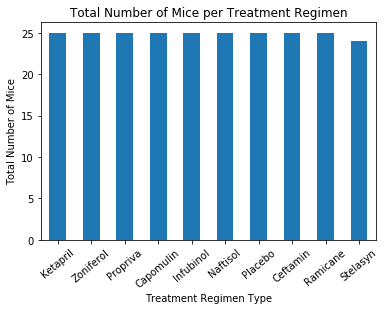

In [121]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
grouped_regimen_df = final_df.groupby('Drug Regimen')

#View how many mice are in each regimen and regimen info
drug = final_df["Drug Regimen"].value_counts()
drug

#Plot values of mice versus regimen type
final_df['Drug Regimen'].value_counts().plot(kind="bar", title = "Total Number of Mice per Treatment Regimen")
plt.ylabel ("Total Number of Mice")
plt.xticks(rotation=40, horizontalalignment="center")
plt.xlabel ("Treatment Regimen Type")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3A06A0C18>],
      dtype=object)

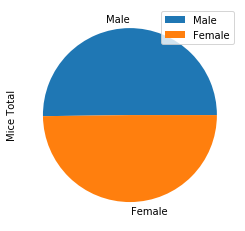

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gender_df = final_df.groupby('Sex')

#View how many mice are in each gender
gender = final_df["Sex"].value_counts()
gender

#Plot values of mice versus gender type
gender = pd.DataFrame({"Mice Total":[125, 124]},
                      index=["Male", "Female"])
gender.plot(kind = "pie", subplots =True)


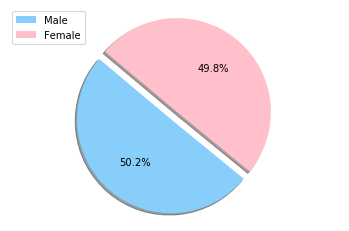

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Referenced from:https://pythonspot.com/matplotlib-pie-chart/

#Data layout
#labels = 'Male','Female'
sizes = [125,124]
colors = ['lightskyblue', 'pink']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [125]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [126]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [127]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [128]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#plt.scatter(final_df.iloc[:,5],final_df.iloc[:,7])
#plt.xlabel('Mouse Weight')
#plt.ylabel('Average Tumor Volume (mm3)')
#plt.show()

## Correlation and Regression

In [129]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Linear Regression----------------------------------------------------------
#x_values = cap_data ["Weight (g)"]
#y_values = cap_data ["Tumor Volume (mm3)"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Mouse Weight')
#plt.ylabel('Average Tumor Volume (mm3)')
#plt.show()

#Correlation-----------------------------------------------------------------
#mouse_weight = final_df.iloc[:,5]
#avgtumor_volume = final_df.iloc[:,7]
#correlation = sts.pearsonr(mouse_weight,avgtumor_volume)
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#plt.scatter(mouse_weight,avgtumor_volume)
#plt.xlabel('Mouse Weight')
#plt.ylabel('Average Tumor Volume (mm3)')
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#plt.show()